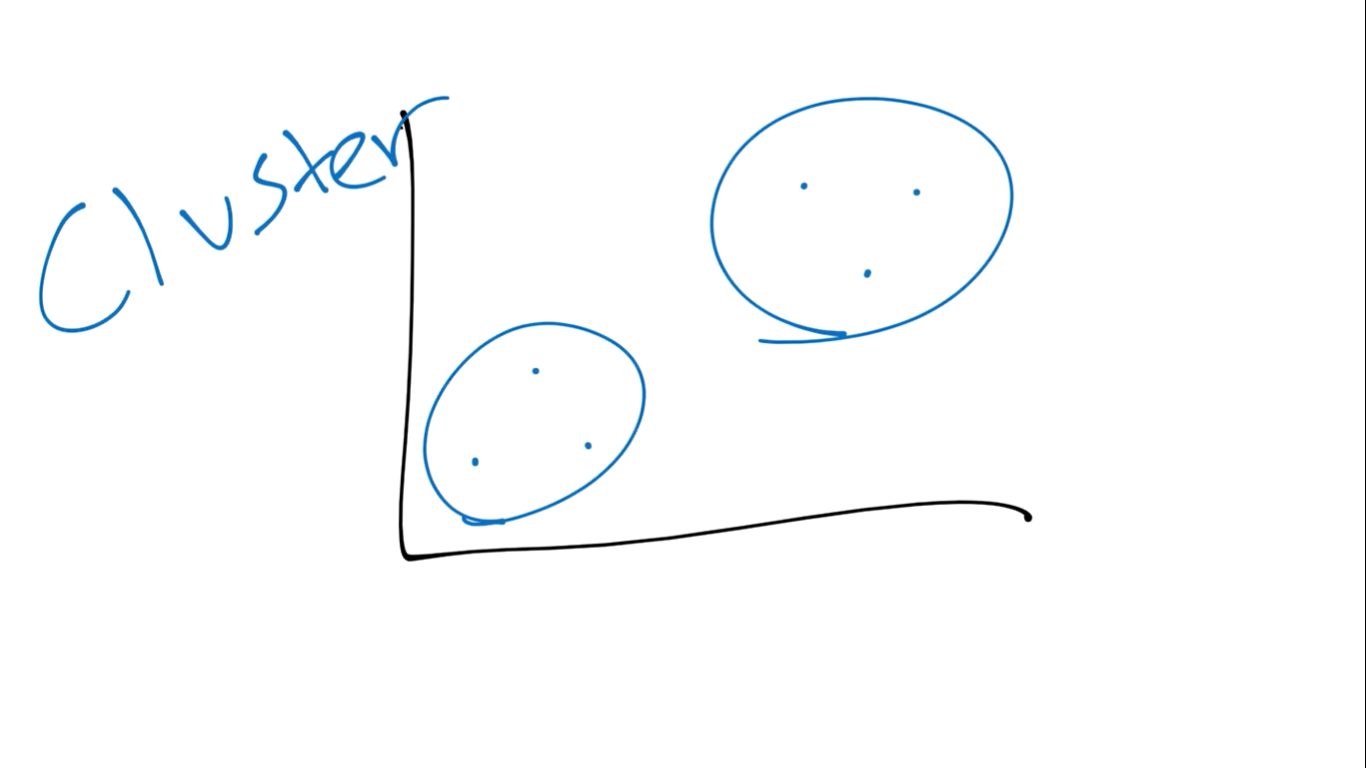

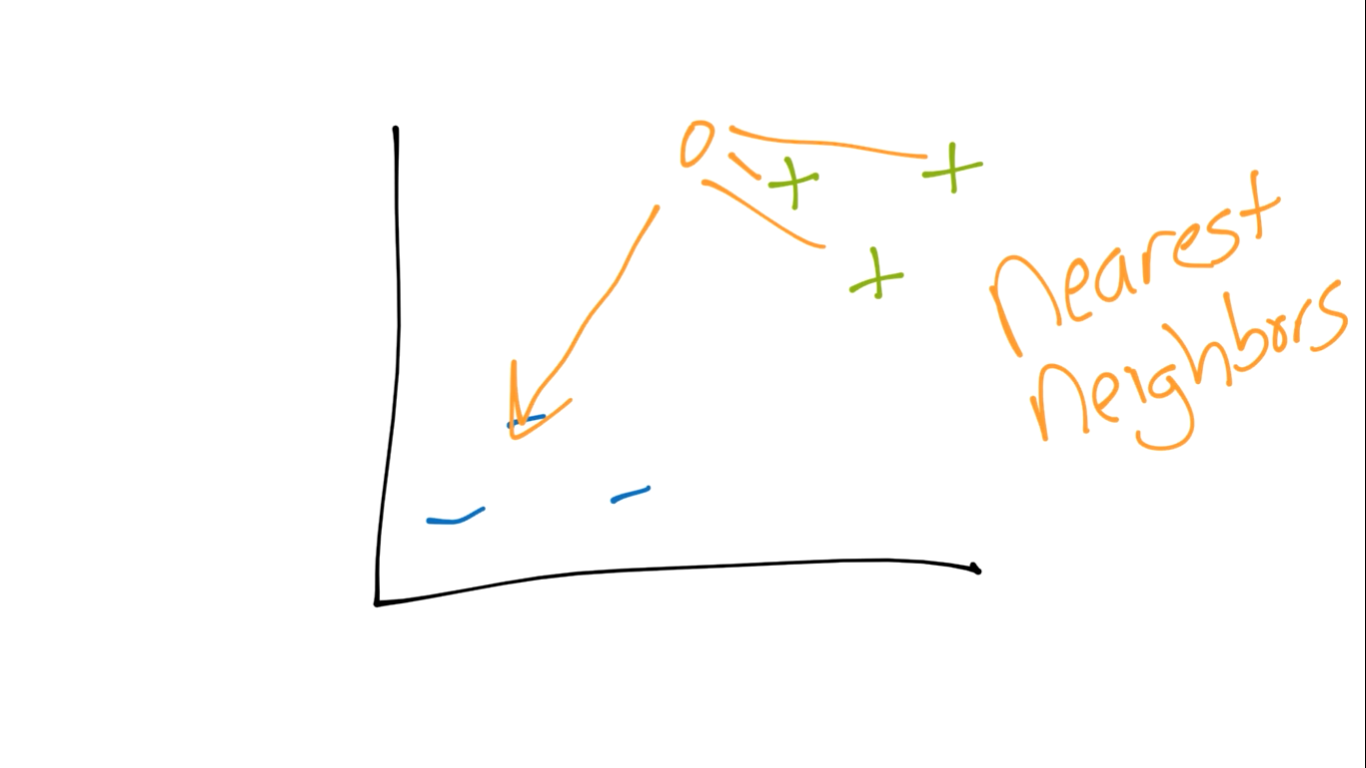

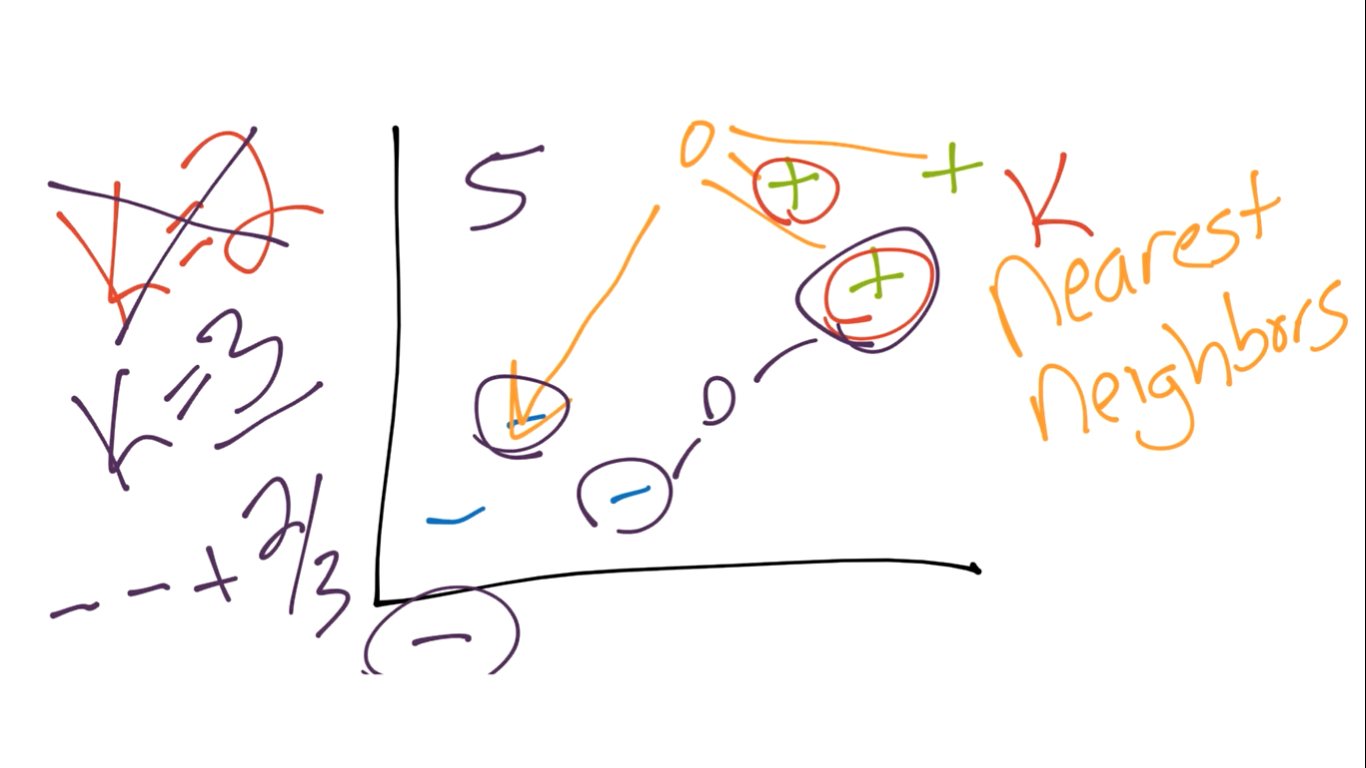

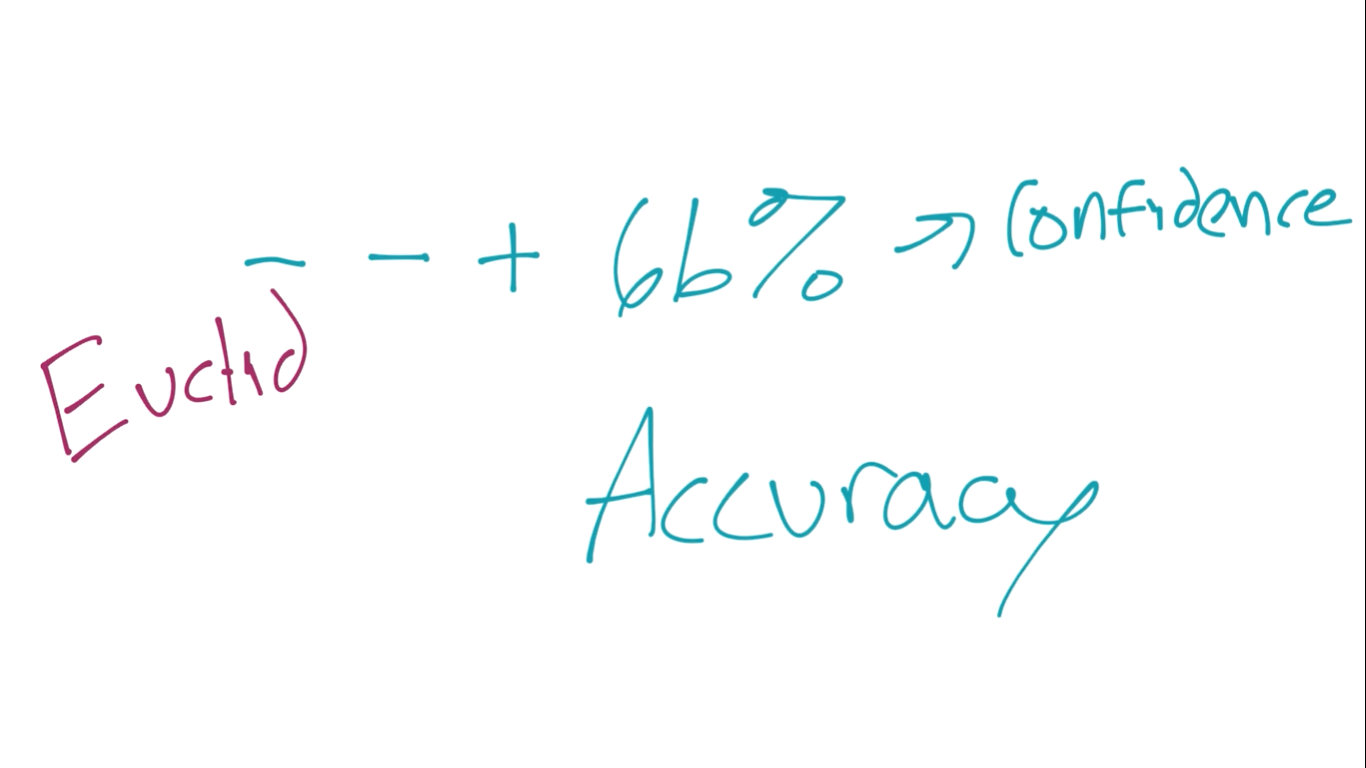

In [26]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import random

style.use('fivethirtyeight')

In [27]:
df = pd.read_csv("C:\\Users\\Conure\\Downloads\\breast-cancer-wisconsin.data")
df.replace('?',-99999,inplace=True)
df.drop('id',1,inplace=True)
full_data =df.astype(float).values.tolist()
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_unclei,bland_chrom,norm_uncleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train),len(X_test),len(y_train),len(y_test))

559 140 559 140


In [5]:
np.shape(X_test)

(140, 9)

In [6]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9785714285714285


In [7]:
example_measure = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measure = example_measure.reshape(len(example_measure),-1)
np.shape(example_measure)

(2, 9)

In [8]:
prediction = clf.predict(example_measure)

print(prediction)

[2 2]


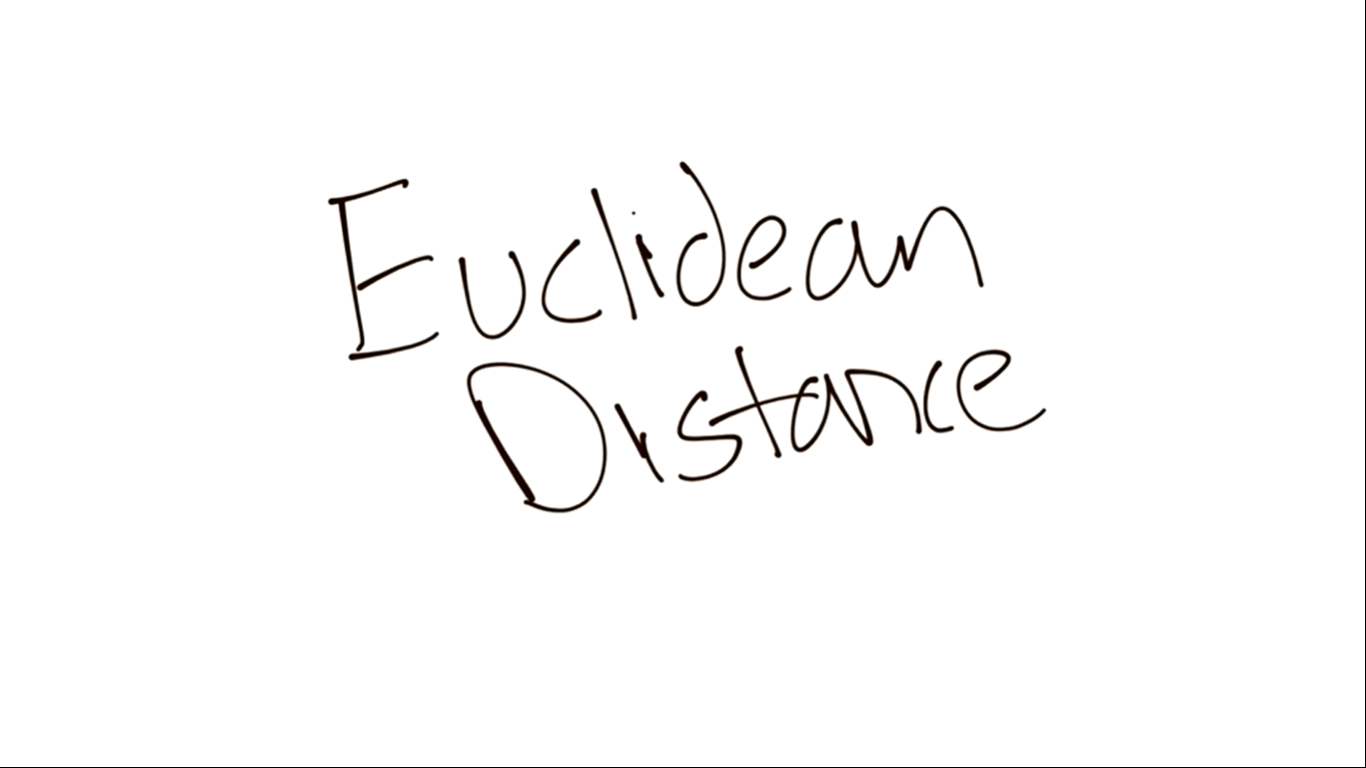

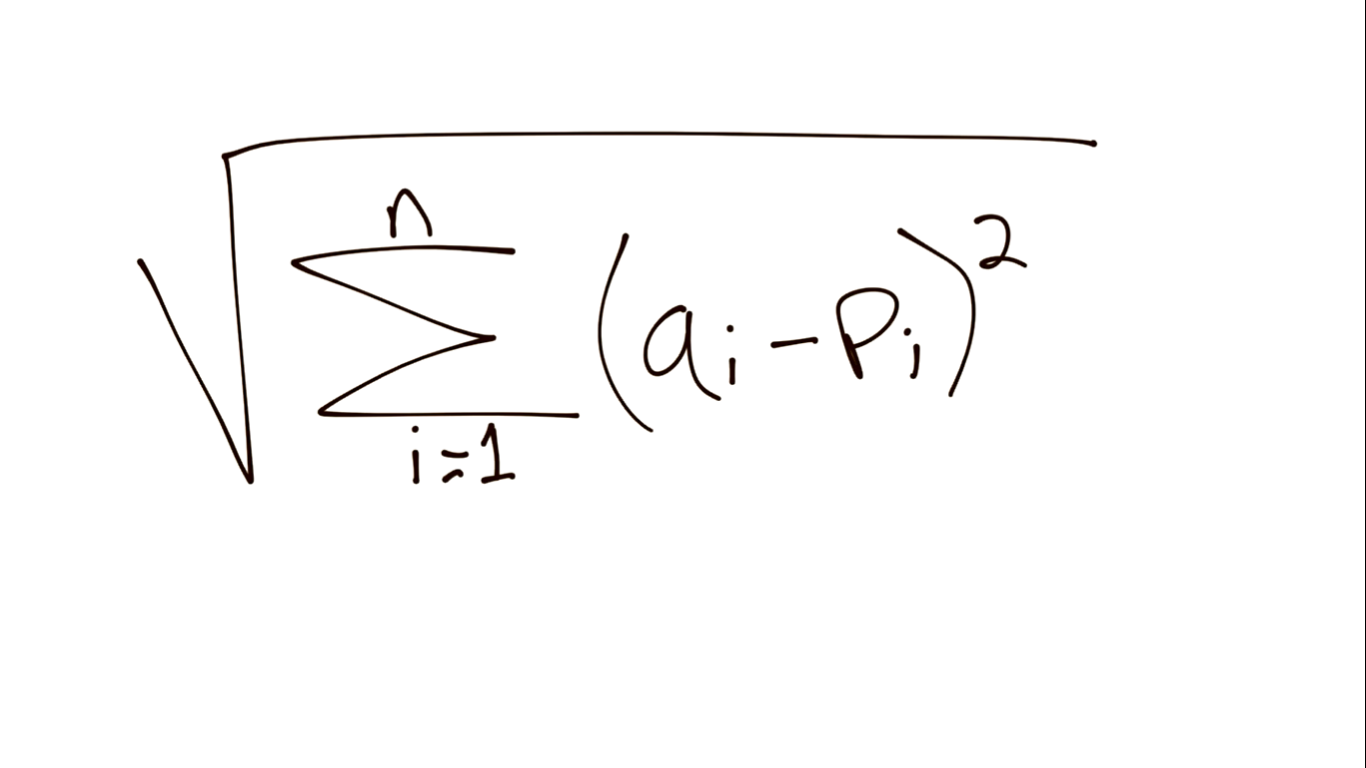

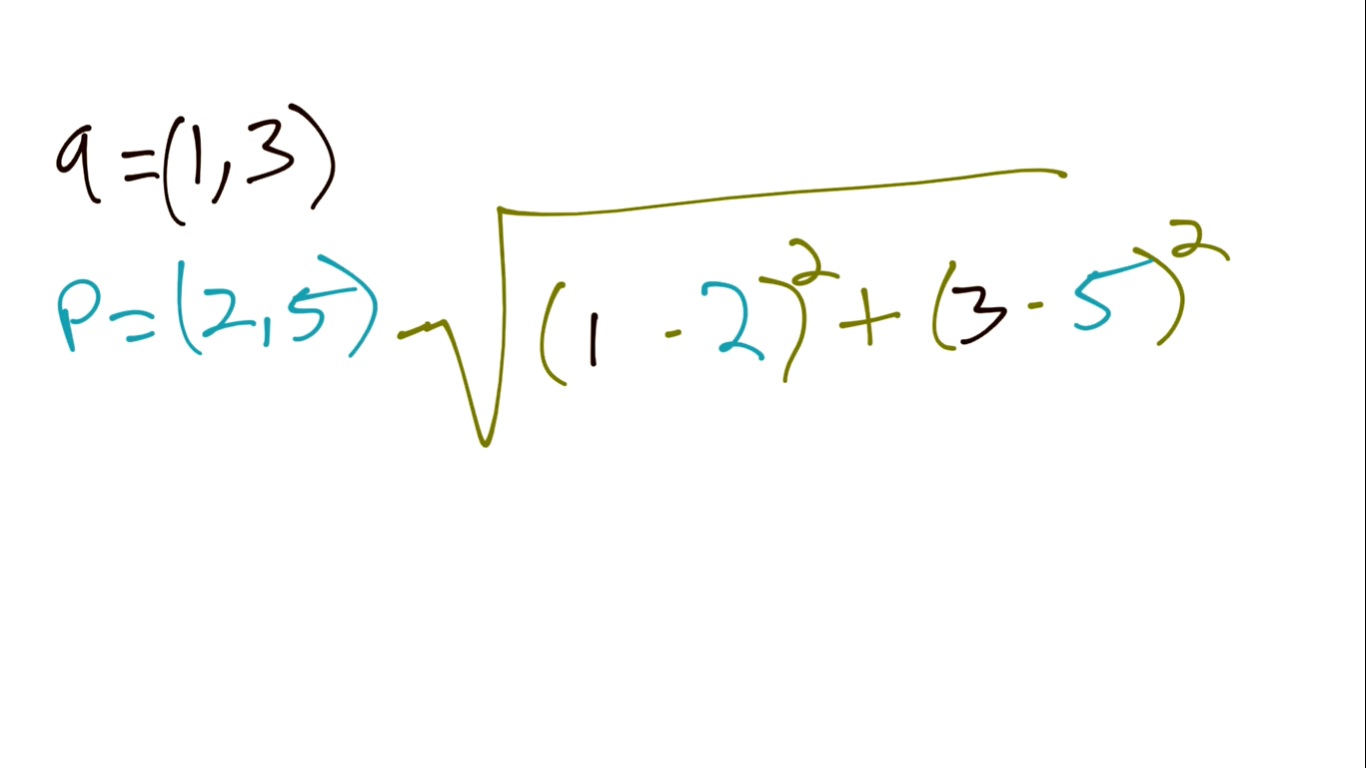

In [9]:
from math import sqrt

plot1 = [1,3]
plot2 = [2,5]


euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
print(euclidean_distance)

2.23606797749979


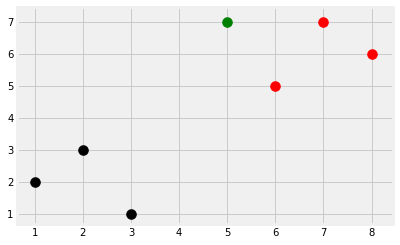

In [10]:
dataset={'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
        
# one liner for above loop

#[[plot.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,color='g')
plt.show()

In [43]:
def k_nearest_neighbors(data, perdict, k=3):
    if len(data) >= k:
        warning.warn('K is set to a value less then total voting group')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(perdict))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    votes_result=Counter(votes).most_common(1)[0][0]
    confidence=Counter(votes).most_common(1)[0][1]/k

    return votes_result,confidence

In [25]:
result = k_nearest_neighbors(dataset,new_features,k=3)

print(result)

[('r', 3)]
r


In [29]:
print(full_data[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [30]:
# shuffle the data set 

random.shuffle(full_data)

In [32]:
test_size=0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]

In [33]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [ ]:
train_set[:5]

In [44]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidenc = k_nearest_neighbors(train_set,data,k=5)
        if group == vote:
            correct +=1
        else:
            print(confidenc)
        total+=1   

        

print('accuracy:', correct/total)

0.6
0.6
1.0
1.0
accuracy: 0.9712230215827338


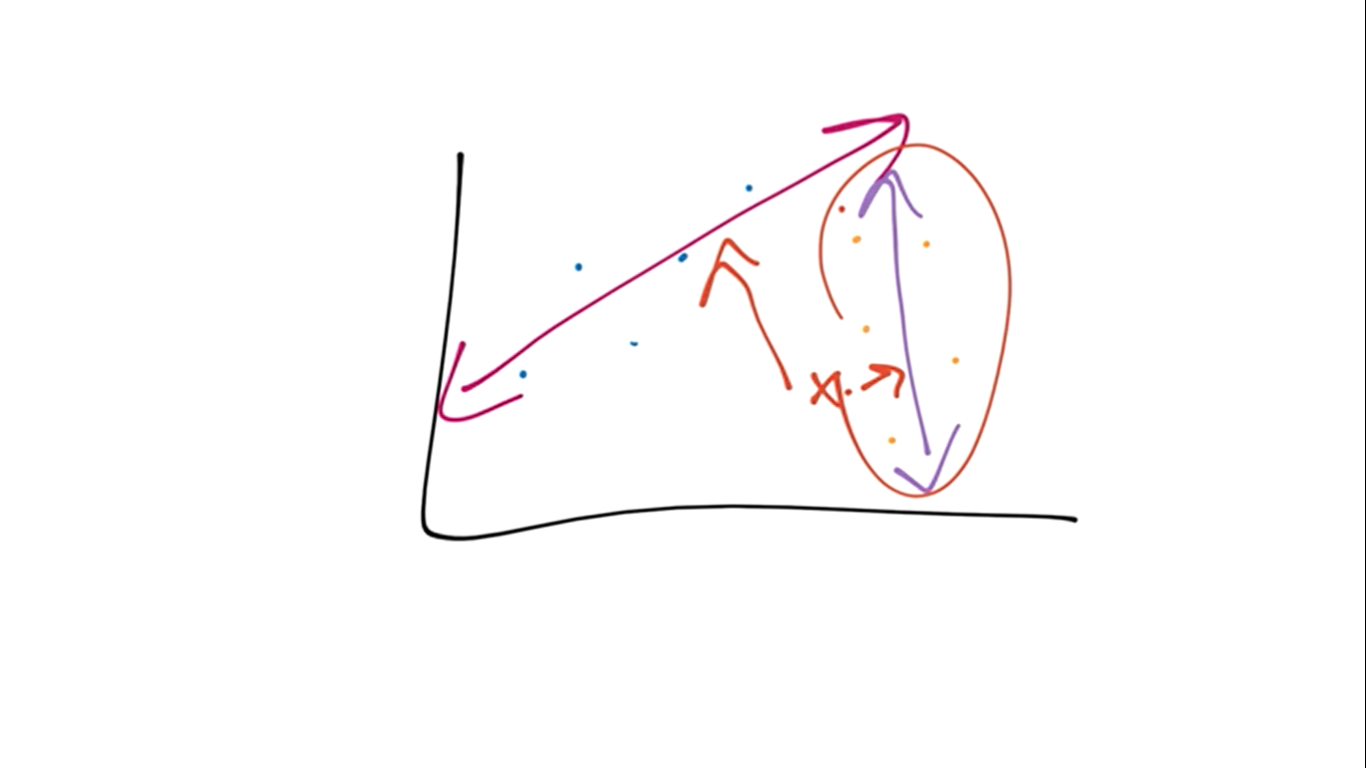

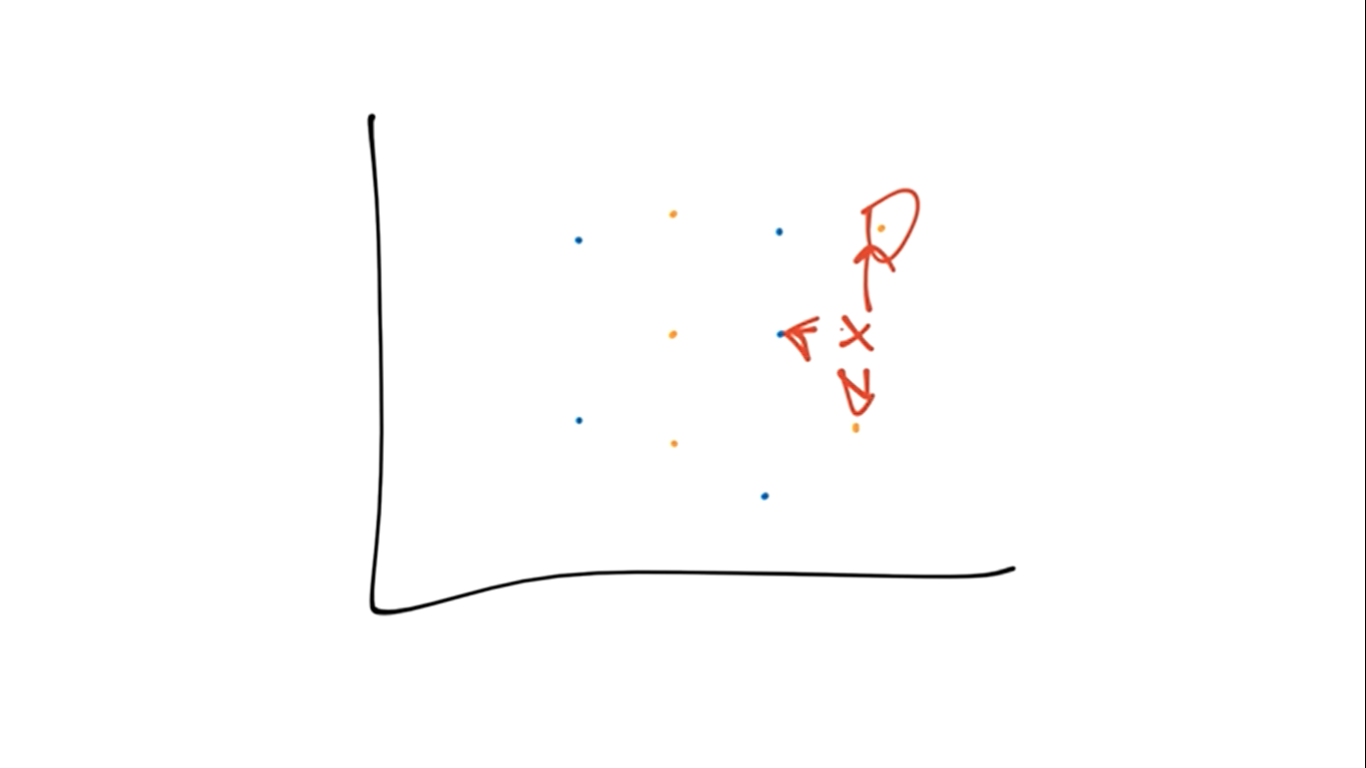